In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
path = '/home/mlmaster/Code/Ing_ml_P6/logs/'
data = pd.read_csv(path + 'logs.csv')

In [3]:
columns = []
for i in data.columns:
    if 'Unnamed' not in i:
        columns.append(i)

In [4]:
data = data[columns] #.set_index('Index')

In [5]:
maxVal = data.loc[data['Validation Accuracy'].idxmax(),:]
maxValPath = data.loc[data['Validation Accuracy'].idxmax(),'Index']
maxValPath = path + str(maxValPath) + '/Accuracy.jpg'

Let's open the image of the max Validation Accuracy

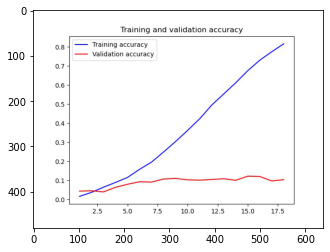

In [11]:
im = Image.open(maxValPath)
plt.imshow(im)
plt.show()

We can see from the Training curve that the model overfitted, let's try to find a model that has almost the same accuracy but did not overfit

Loading Index 54 ...
Validation Accuracy: [0.1225]


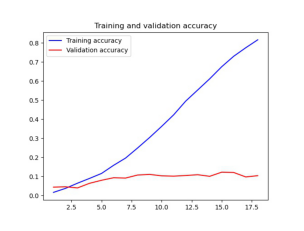

Loading Index 41 ...
Validation Accuracy: [0.11916666]


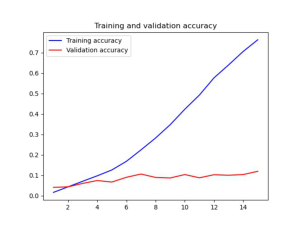

Loading Index 47 ...
Validation Accuracy: [0.11666667]


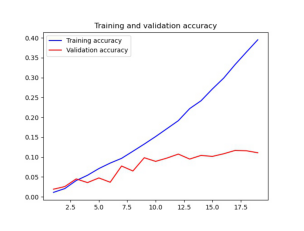

Loading Index 43 ...
Validation Accuracy: [0.10833333]


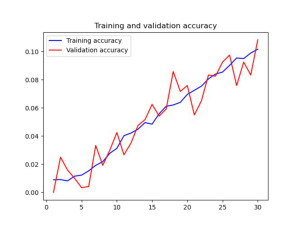

In [17]:
dataTop5 = data.sort_values(by='Validation Accuracy', ascending=False)[0:4]
indexTop5 = dataTop5['Index'].values

for i in indexTop5:
    print('Loading Index', i, '...')
    print('Validation Accuracy:', dataTop5[dataTop5['Index'] == i]['Validation Accuracy'].values)
    ValPath = path + str(i) + '/Accuracy.jpg'
    im = Image.open(ValPath)
    plt.imshow(im)
    plt.axis('off')
    plt.show()

It seems like the last one did not overfit, we see that the Validation Accuracy follows the Training Accuracy

In [18]:
data[data['Index'] == 43]

,Index,Img Height,Img Width,Batch Size,Learning Rate,Epochs,Steps Per Epoch,validation Steps,Zca Whitening,Horizontal Flip,Model Type,Validation Accuracy,Validation Loss
32,43,130,130,20,0.0001,30,600,60,False,True,3,0.108333,0.381001


Even if the Validation accuracy is lower, we'll keep this set of parameters as the best one, as we see that the model did not overfit ;